In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
sns.set(font_scale=1.0)

In [126]:
df_comp = pd.read_csv("play.csv", dtype={'display_name': object})
df_comp = df_comp.sort_values(by=['bin', 'model'])
df_comp.tail(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,model_id,bin,model,display_name
22995,2024-06-02 11:40:38.645,game_episodes,639,1736,6,127,818.0,898,35.920000,375,300,False,NaN,0.02,T1-ni_3400000_13_target_net,34.0,T1_ni,34
22996,2024-06-02 11:40:40.093,game_episodes,639,1982,7,246,2652.0,2759,56.306122,351,900,False,NaN,0.02,T1-ni_3400000_13_target_net,34.0,T1_ni,34
22997,2024-06-02 11:40:41.648,game_episodes,639,2247,8,265,3069.0,3161,60.788462,348,1100,True,NaN,0.02,T1-ni_3400000_13_target_net,34.0,T1_ni,34
22998,2024-06-02 11:40:43.747,game_episodes,639,2608,9,361,3049.0,3161,43.902778,328,400,True,NaN,0.02,T1-ni_3400000_13_target_net,34.0,T1_ni,34
22999,2024-06-02 11:40:44.483,game_episodes,639,2735,10,127,818.0,898,35.920000,375,300,False,NaN,0.02,T1-ni_3400000_13_target_net,34.0,T1_ni,34


In [127]:
df_B1 = df_comp[df_comp['model'] == 'B1'].sort_values(by='bin')
df_B2 = df_comp[df_comp['model'] == 'B2'].sort_values(by='bin')
df_T1_ext_ni = df_comp[df_comp['model'] == 'T1_ext_ni'].sort_values(by='bin')
df_T1_ni = df_comp[df_comp['model'] == 'T1_ni'].sort_values(by='bin')
df_T2_ni = df_comp[df_comp['model'] == 'T2_ni'].sort_values(by='bin')
df_C1_ni = df_comp[df_comp['model'] == 'C1_ni'].sort_values(by='bin')
df_P1_ni = df_comp[df_comp['model'] == 'P1_ni'].sort_values(by='bin')
df_P1_ext_ni = df_comp[df_comp['model'] == 'P1_ext_ni'].sort_values(by='bin')
df_T2_ext_ni = df_comp[df_comp['model'] == 'T2_ext_ni'].sort_values(by='bin')
df_C1_ext_ni = df_comp[df_comp['model'] == 'C1_ext_ni'].sort_values(by='bin')
df_T2_ext_ni.tail(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,model_id,bin,model,display_name
102684,2024-06-06 22:04:16.499,game_episodes,639,880,5,132,1429.0,1511,58.115385,374,400,False,NaN,0.02,T2_ext_ni_2300000_13_target_net,23.0,T2_ext_ni,23
102683,2024-06-06 22:04:15.724,game_episodes,639,748,4,315,3059.0,3161,50.983871,338,900,True,NaN,0.02,T2_ext_ni_2300000_13_target_net,23.0,T2_ext_ni,23
102682,2024-06-06 22:04:13.847,game_episodes,639,433,3,132,1429.0,1511,58.115385,374,400,False,NaN,0.02,T2_ext_ni_2300000_13_target_net,23.0,T2_ext_ni,23
102628,2024-06-06 22:03:01.397,game_episodes,561,1980,9,132,1429.0,1511,58.115385,374,400,False,NaN,0.02,T2_ext_ni_2300000_13_target_net,23.0,T2_ext_ni,23
102675,2024-06-06 22:04:07.078,game_episodes,626,1116,6,120,1349.0,1430,62.173913,377,200,False,NaN,0.02,T2_ext_ni_2300000_13_target_net,23.0,T2_ext_ni,23


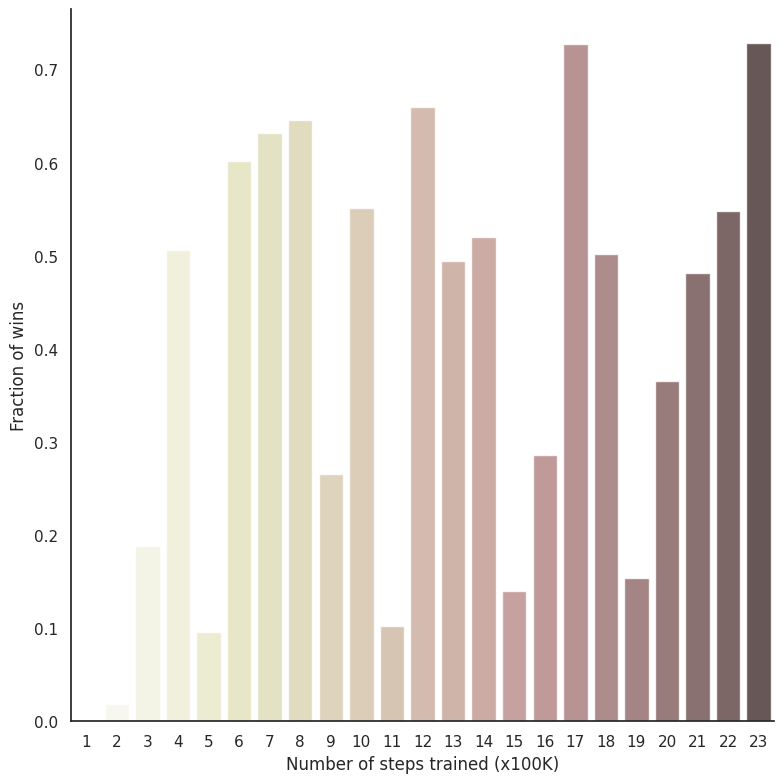

In [128]:
sns.set_style("white")
ax = sns.catplot(data=df_B1, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.8, hue='display_name', palette='pink_r', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the True Baseline intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_B1.png", bbox_inches='tight')
#plt.savefig("./playing_wins_B1.pdf", format='pdf', bbox_inches='tight')

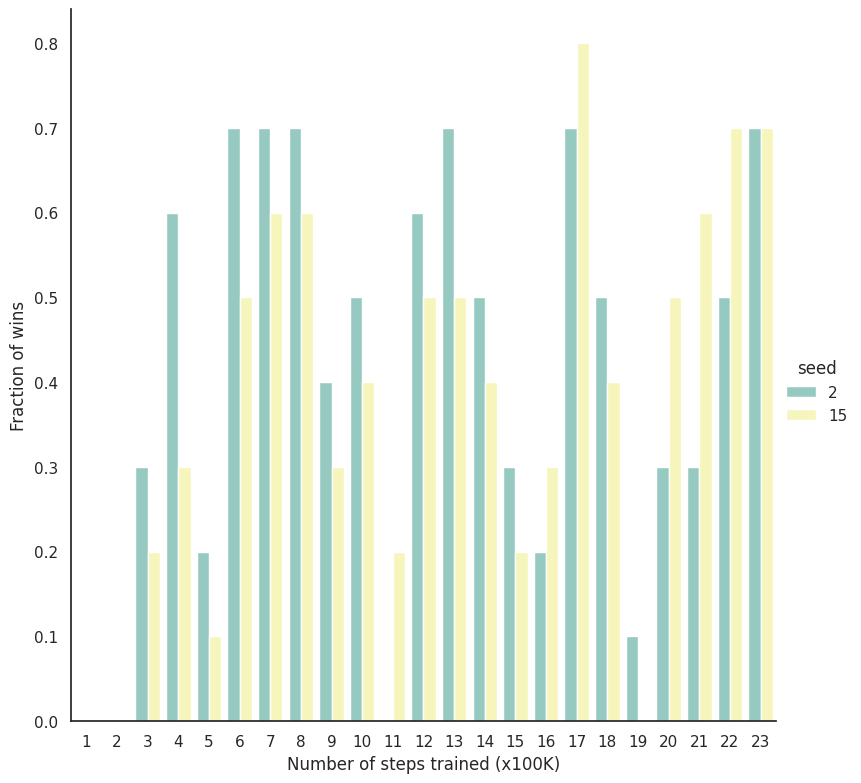

In [129]:
# does seeding matter?
sns.set_style("white")
sns.catplot(data=df_B1[df_B1['seed'] < 20], kind="bar", x="display_name", y="flag", errorbar=None, hue='seed', palette='Set3', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the True Baseline intermediate models for two distinct seeds for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_B1_by_seed.png", bbox_inches='tight')
#plt.savefig("./playing_wins_B1_by_seed.pdf", format='pdf', bbox_inches='tight')

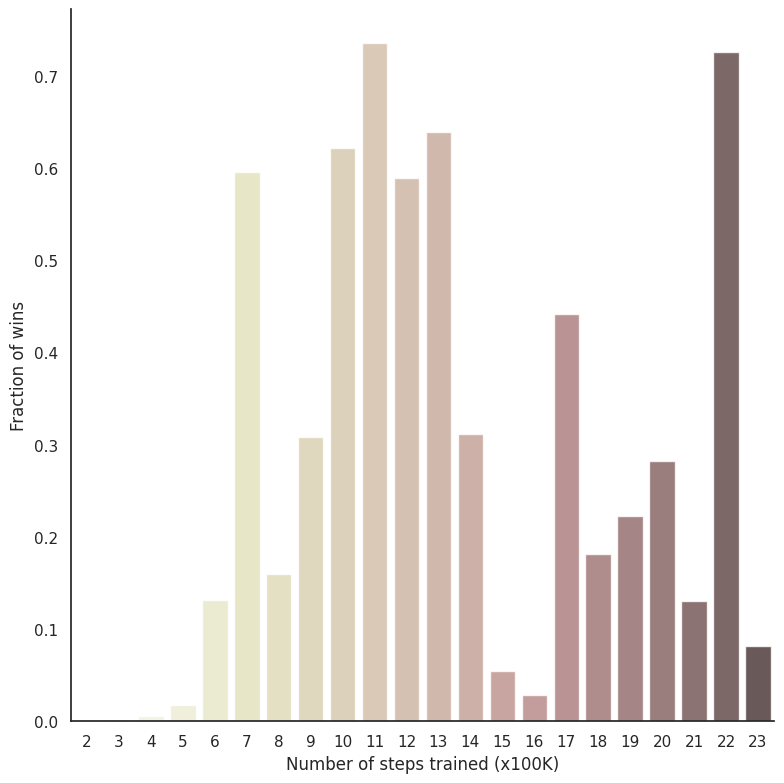

In [130]:
sns.set_style("white")
sns.catplot(data=df_B2, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.8, hue='display_name', palette='pink_r', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Slow Decay Baseline intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_B2.png", bbox_inches='tight')
#plt.savefig("./playing_wins_B2.pdf", format='pdf', bbox_inches='tight')

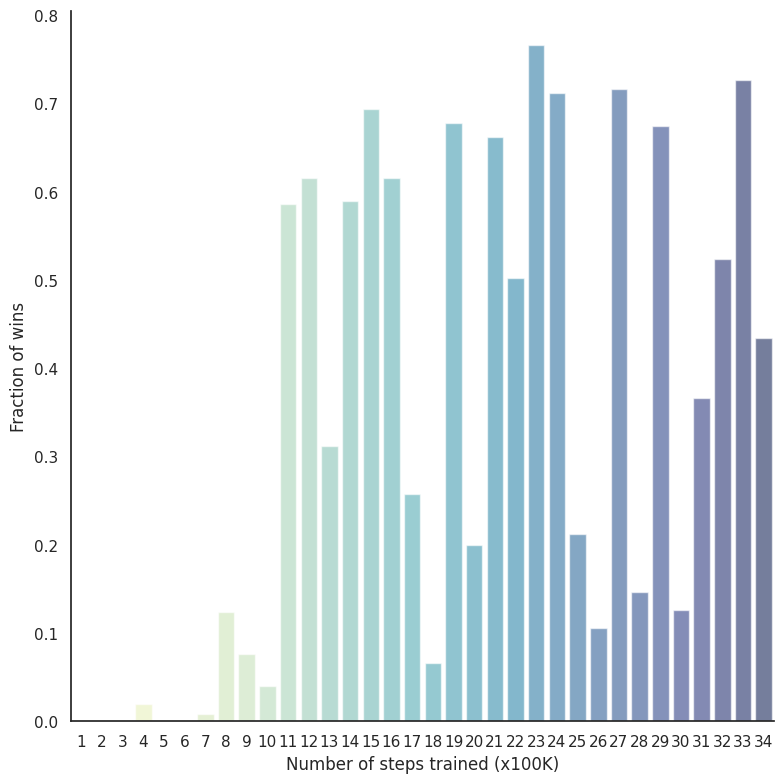

In [131]:
sns.set_style("white")
fig = sns.catplot(data=df_T1_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlGnBu', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Permissive Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_T1_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_T1_ni.pdf", format='pdf', bbox_inches='tight')

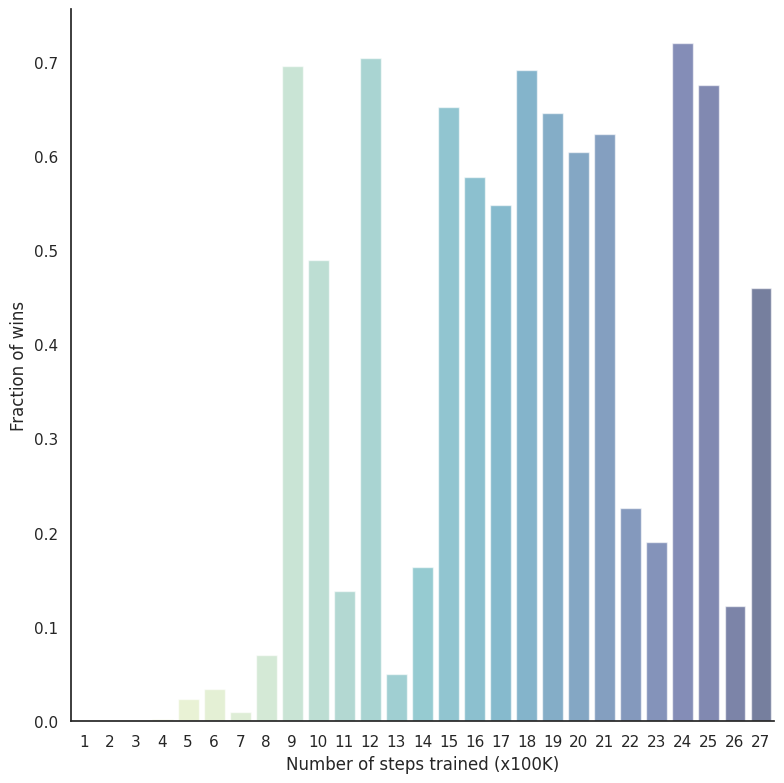

In [132]:
sns.set_style("white")
sns.catplot(data=df_P1_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlGnBu', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Permissive Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_P1_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_P1_ni.pdf", format='pdf', bbox_inches='tight')

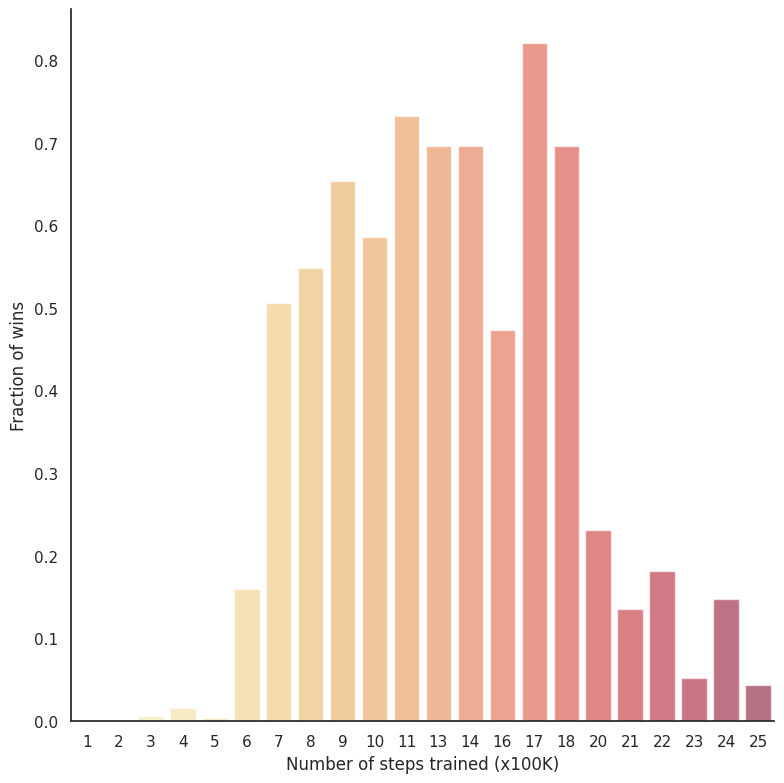

In [133]:
sns.set_style("white")
sns.catplot(data=df_T2_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlOrRd', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Constrained Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_T2_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_T2_ni.pdf", format='pdf', bbox_inches='tight')

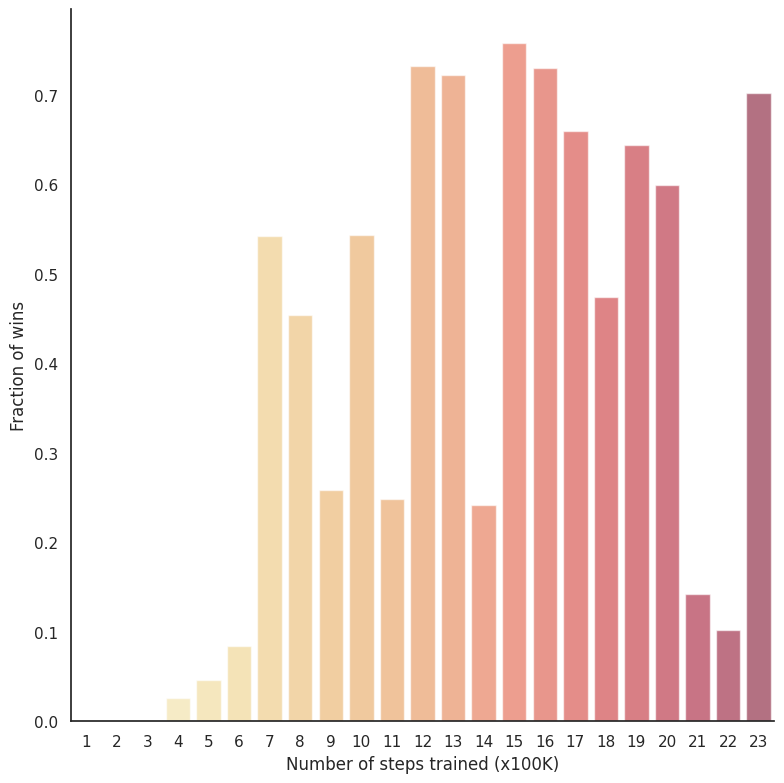

In [134]:
sns.set_style("white")
sns.catplot(data=df_C1_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlOrRd', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Constrained Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_C1_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_C1_ni.pdf", format='pdf', bbox_inches='tight')

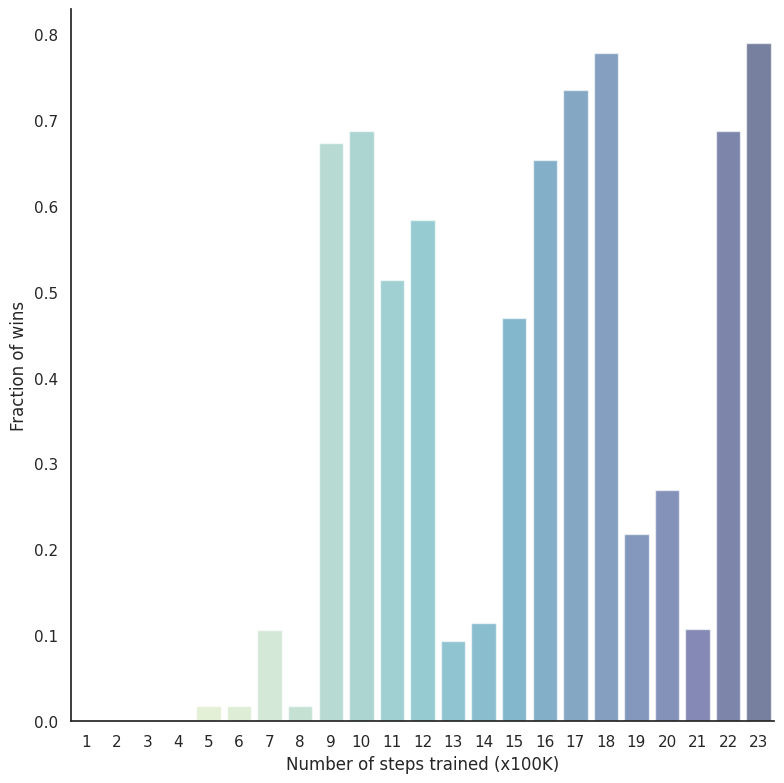

In [135]:
sns.set_style("white")
sns.catplot(data=df_T1_ext_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlGnBu', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Pipeless Permissive Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_T1_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_T1_ext_ni.pdf", format='pdf', bbox_inches='tight')

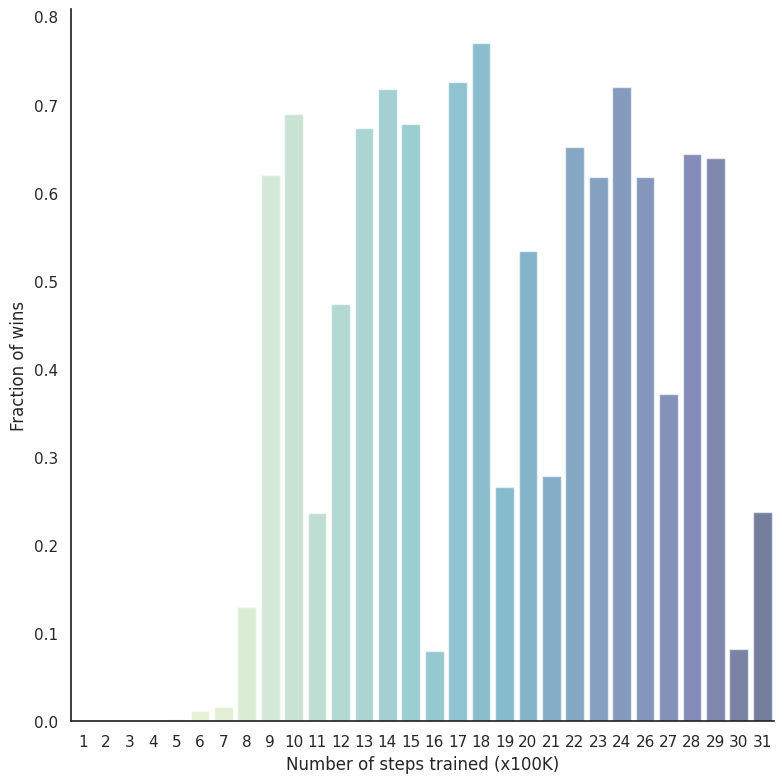

In [136]:
sns.set_style("white")
sns.catplot(data=df_P1_ext_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlGnBu', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing Pipeless Permissive Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_P1_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_P1_ext_ni.pdf", format='pdf', bbox_inches='tight')

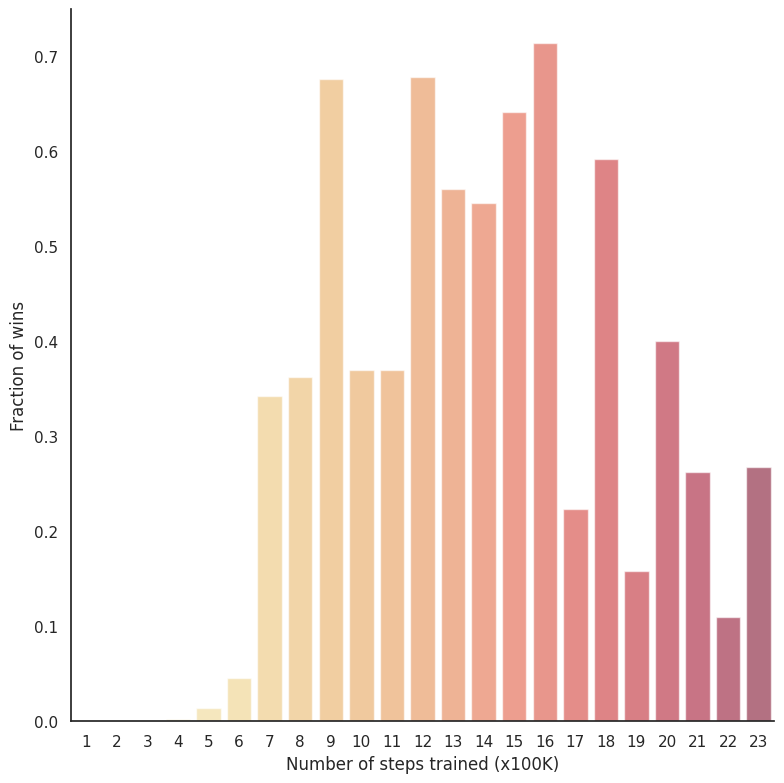

In [137]:
sns.set_style("white")
sns.catplot(data=df_T2_ext_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlOrRd', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Pipeless Constrained Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_T2_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_T2_ext_ni.pdf", format='pdf', bbox_inches='tight')

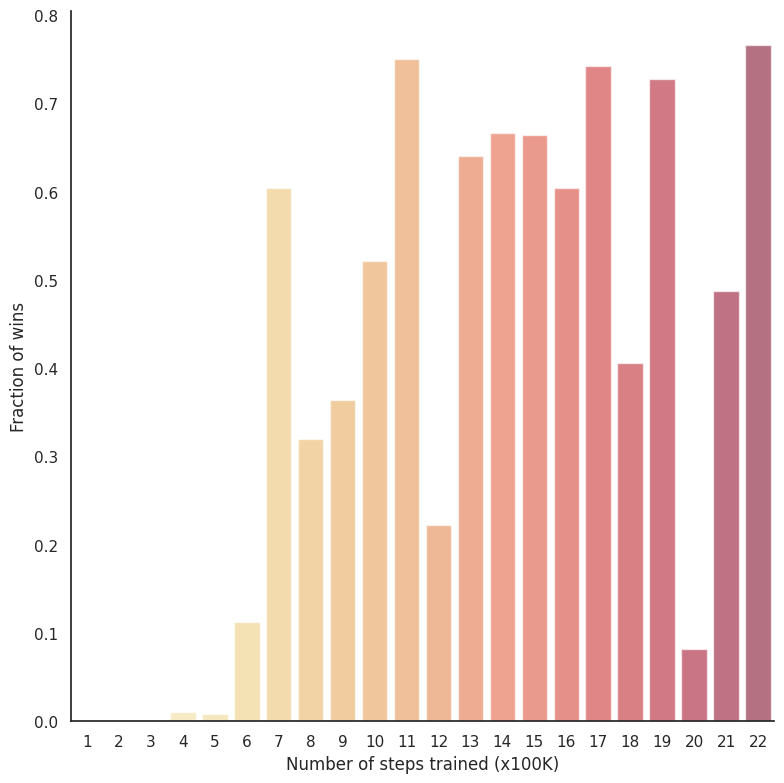

In [138]:
sns.set_style("white")
sns.catplot(data=df_C1_ext_ni, kind="bar", x="display_name", y="flag", errorbar=None, legend=None, alpha=.6, hue='display_name', palette='YlOrRd', height=8).set(xlabel="Number of steps trained (x100K)", ylabel="Fraction of wins")

#plt.title(label="Fraction of wins after playing the Pipeless Constrained Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_wins_C1_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_wins_C1_ext_ni.pdf", format='pdf', bbox_inches='tight')

In [163]:
sns.set(font_scale=2.5)

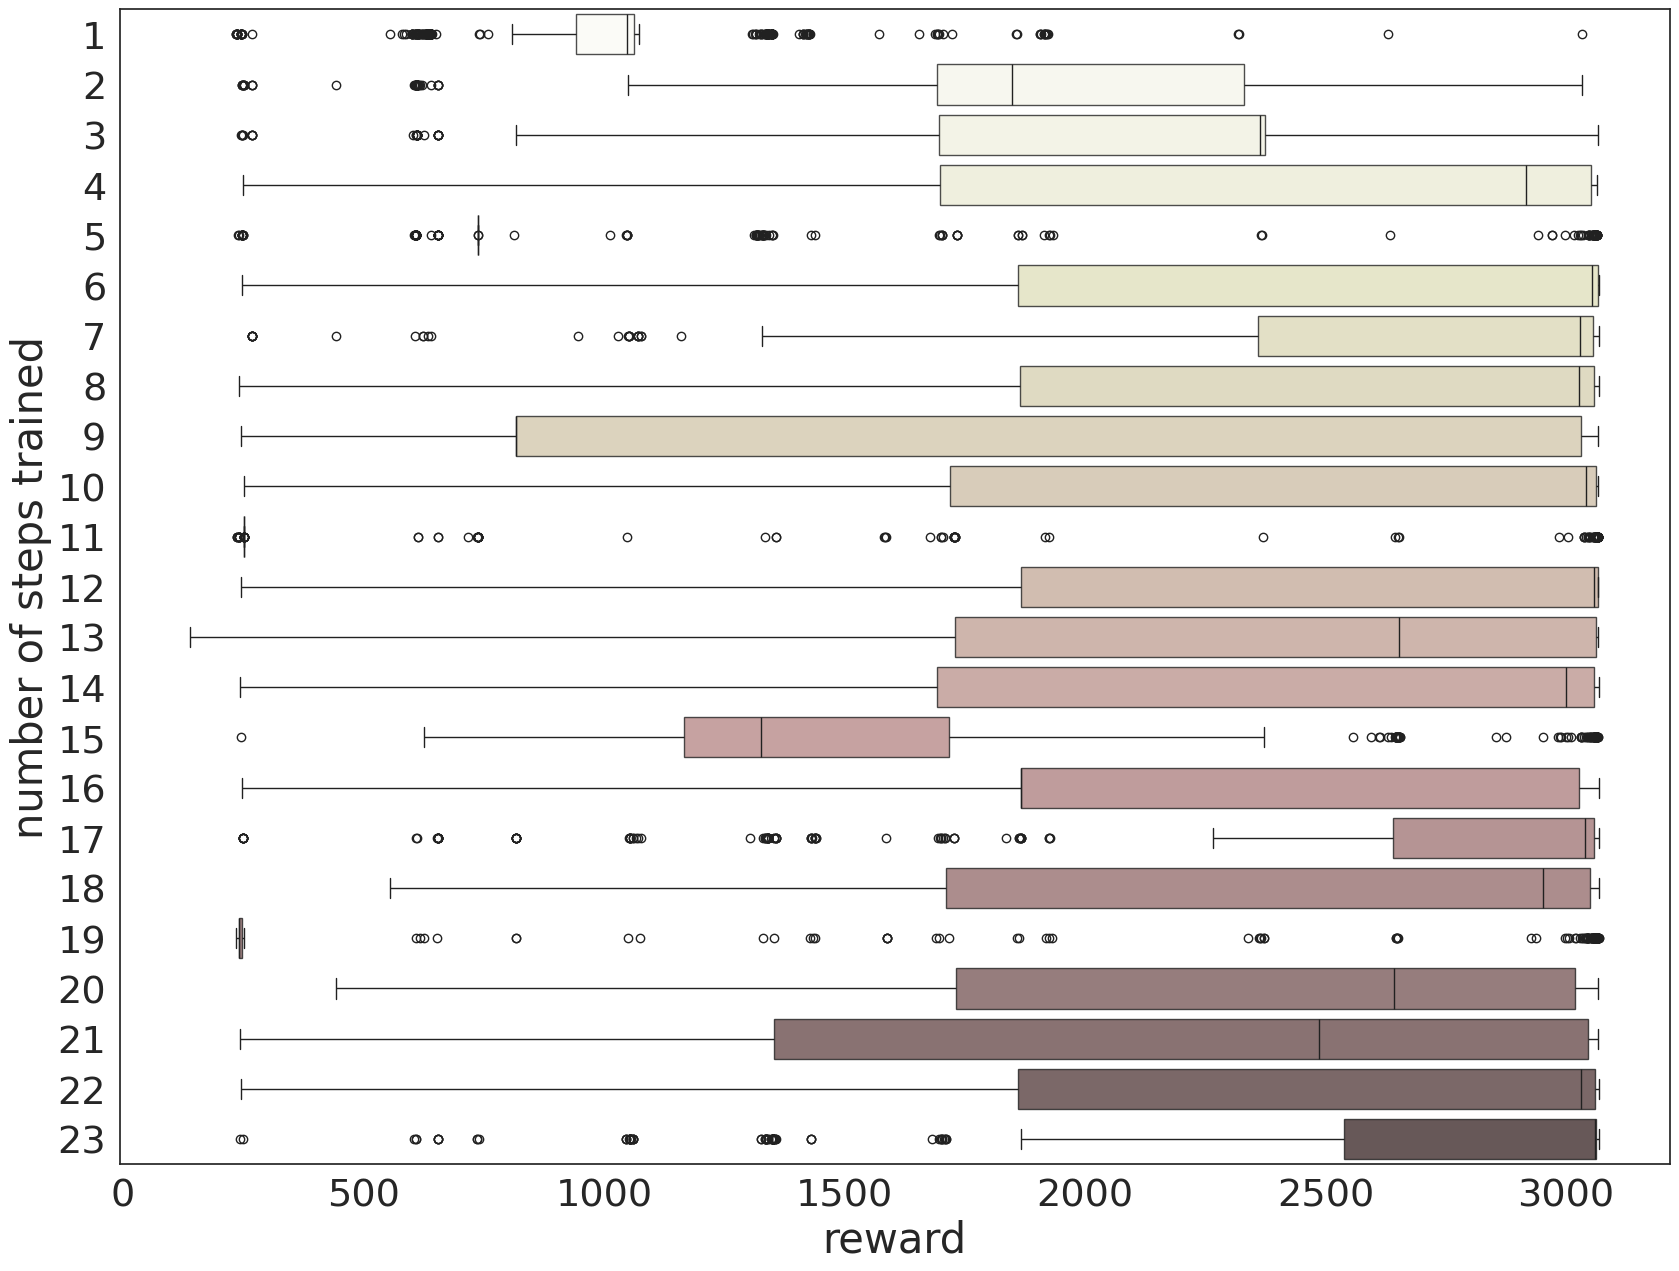

In [164]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='pink_r', desat=0.9, n_colors=23)
sns.boxplot(x="reward", y="display_name", data = df_B1, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the True Baseline intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_B1.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_B1.pdf", format='pdf', bbox_inches='tight')

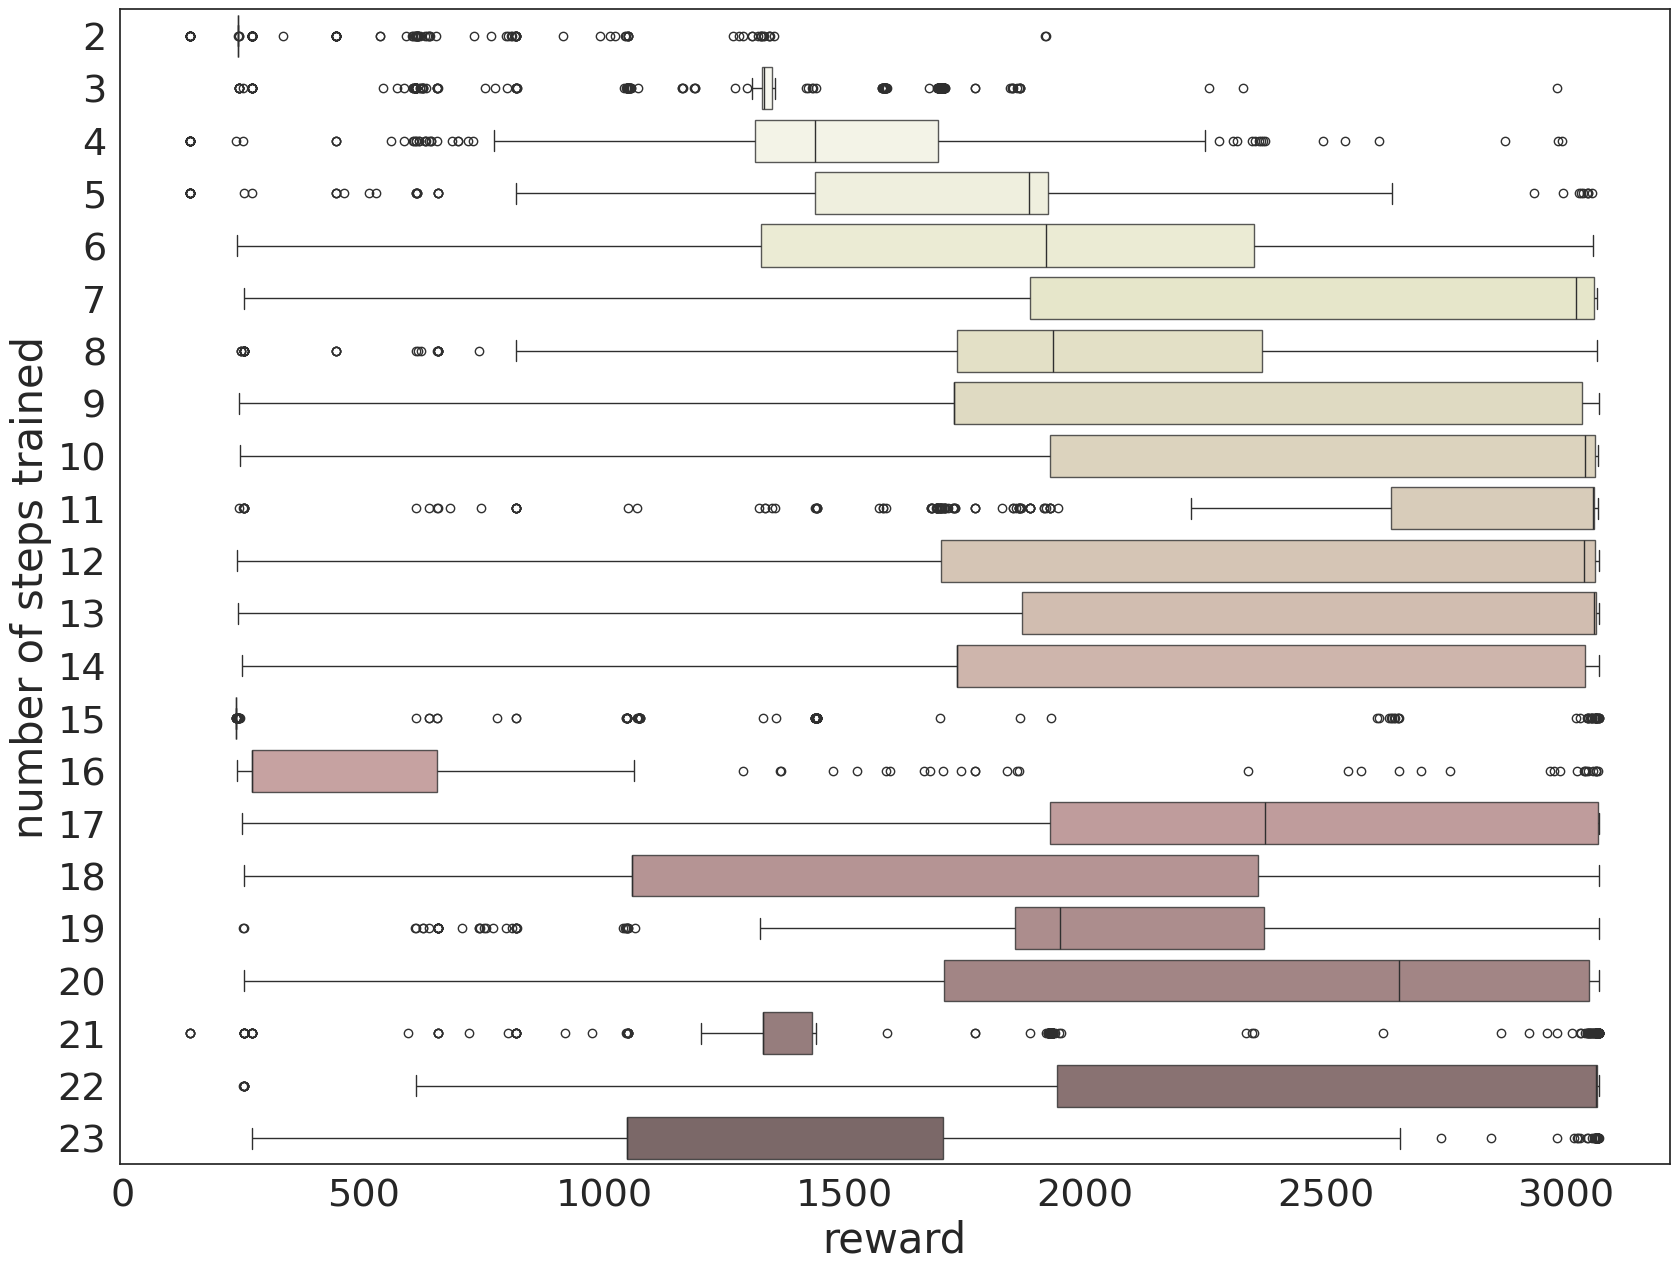

In [165]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='pink_r', desat=0.9, n_colors=23)
sns.boxplot(x ="reward", y="display_name", data = df_B2, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Slow Decay Baseline intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_B2.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_B2.pdf", format='pdf', bbox_inches='tight')

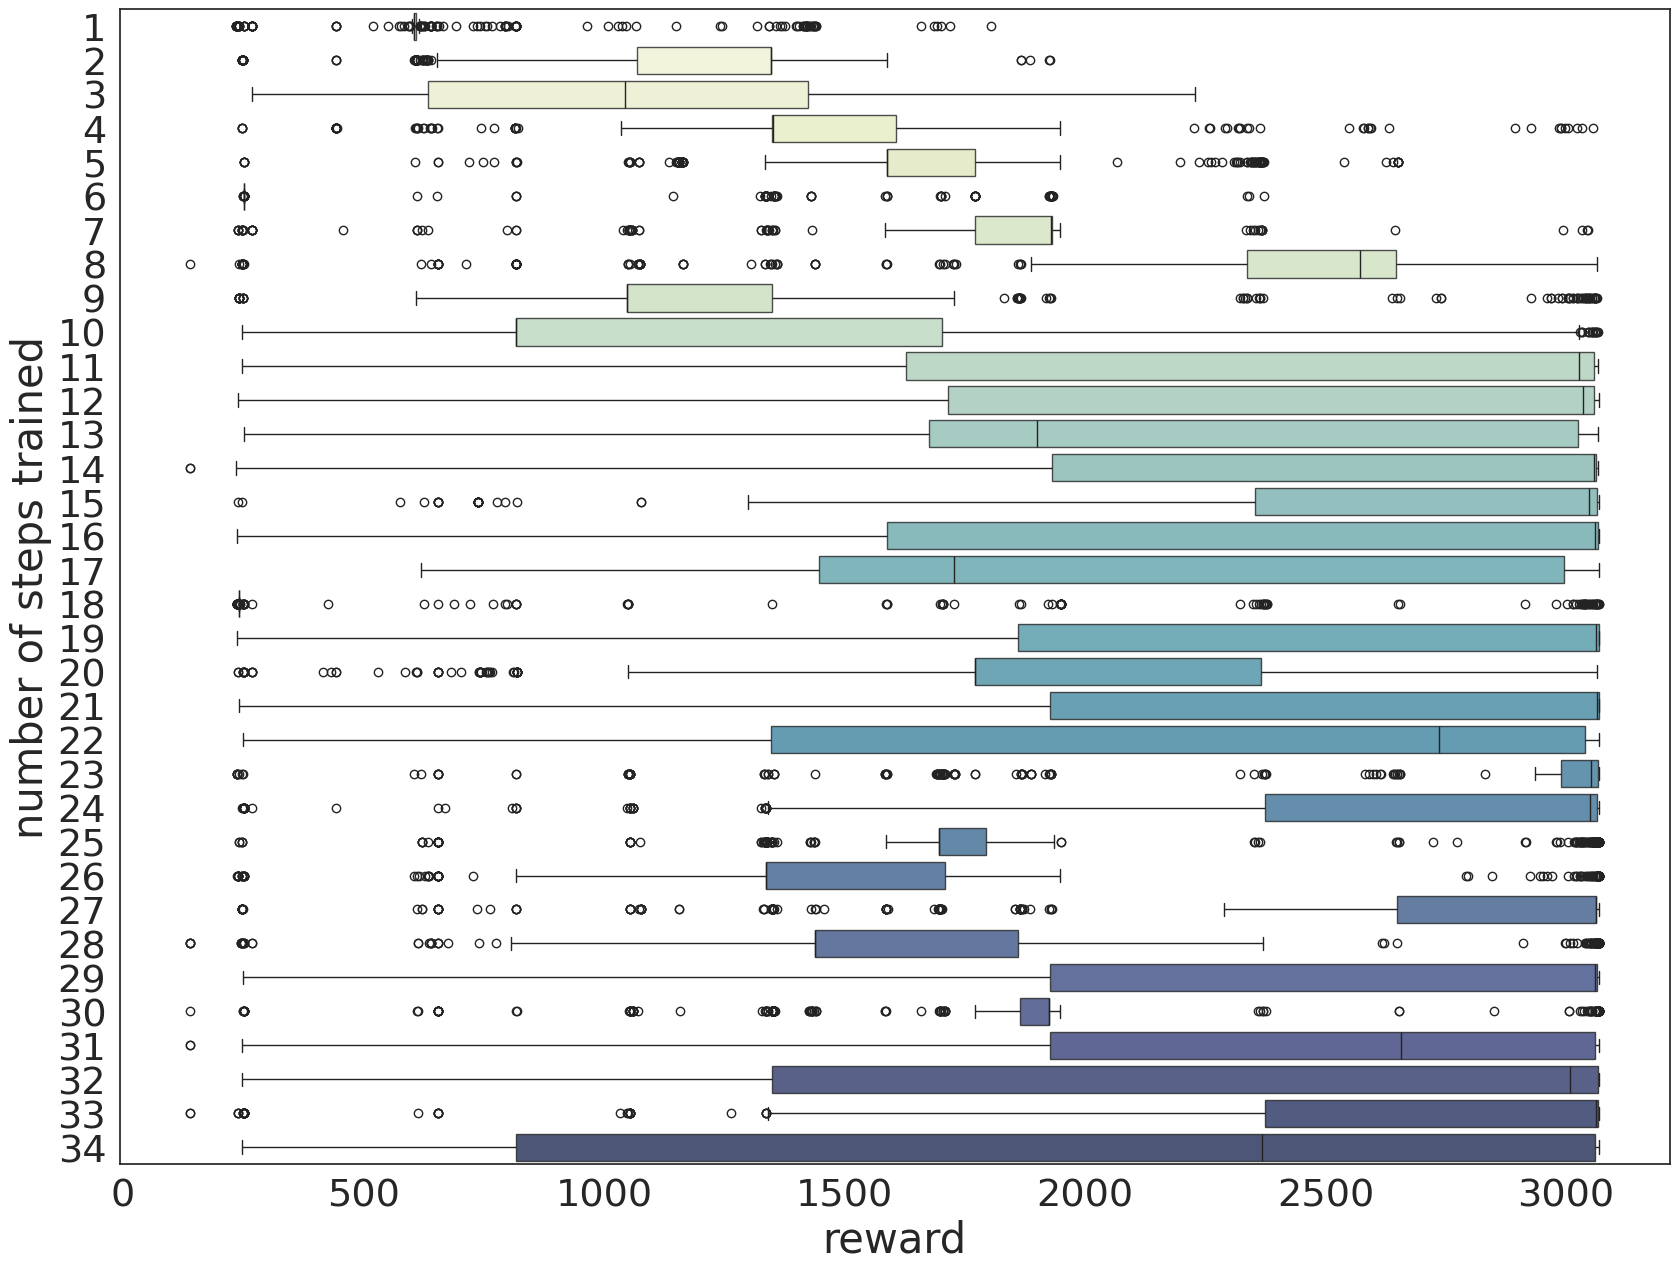

In [166]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlGnBu', desat=0.8, n_colors=34)
sns.boxplot(x ="reward", y="display_name", data = df_T1_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Permissive Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_T1_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_T1_ni.pdf", format='pdf', bbox_inches='tight')

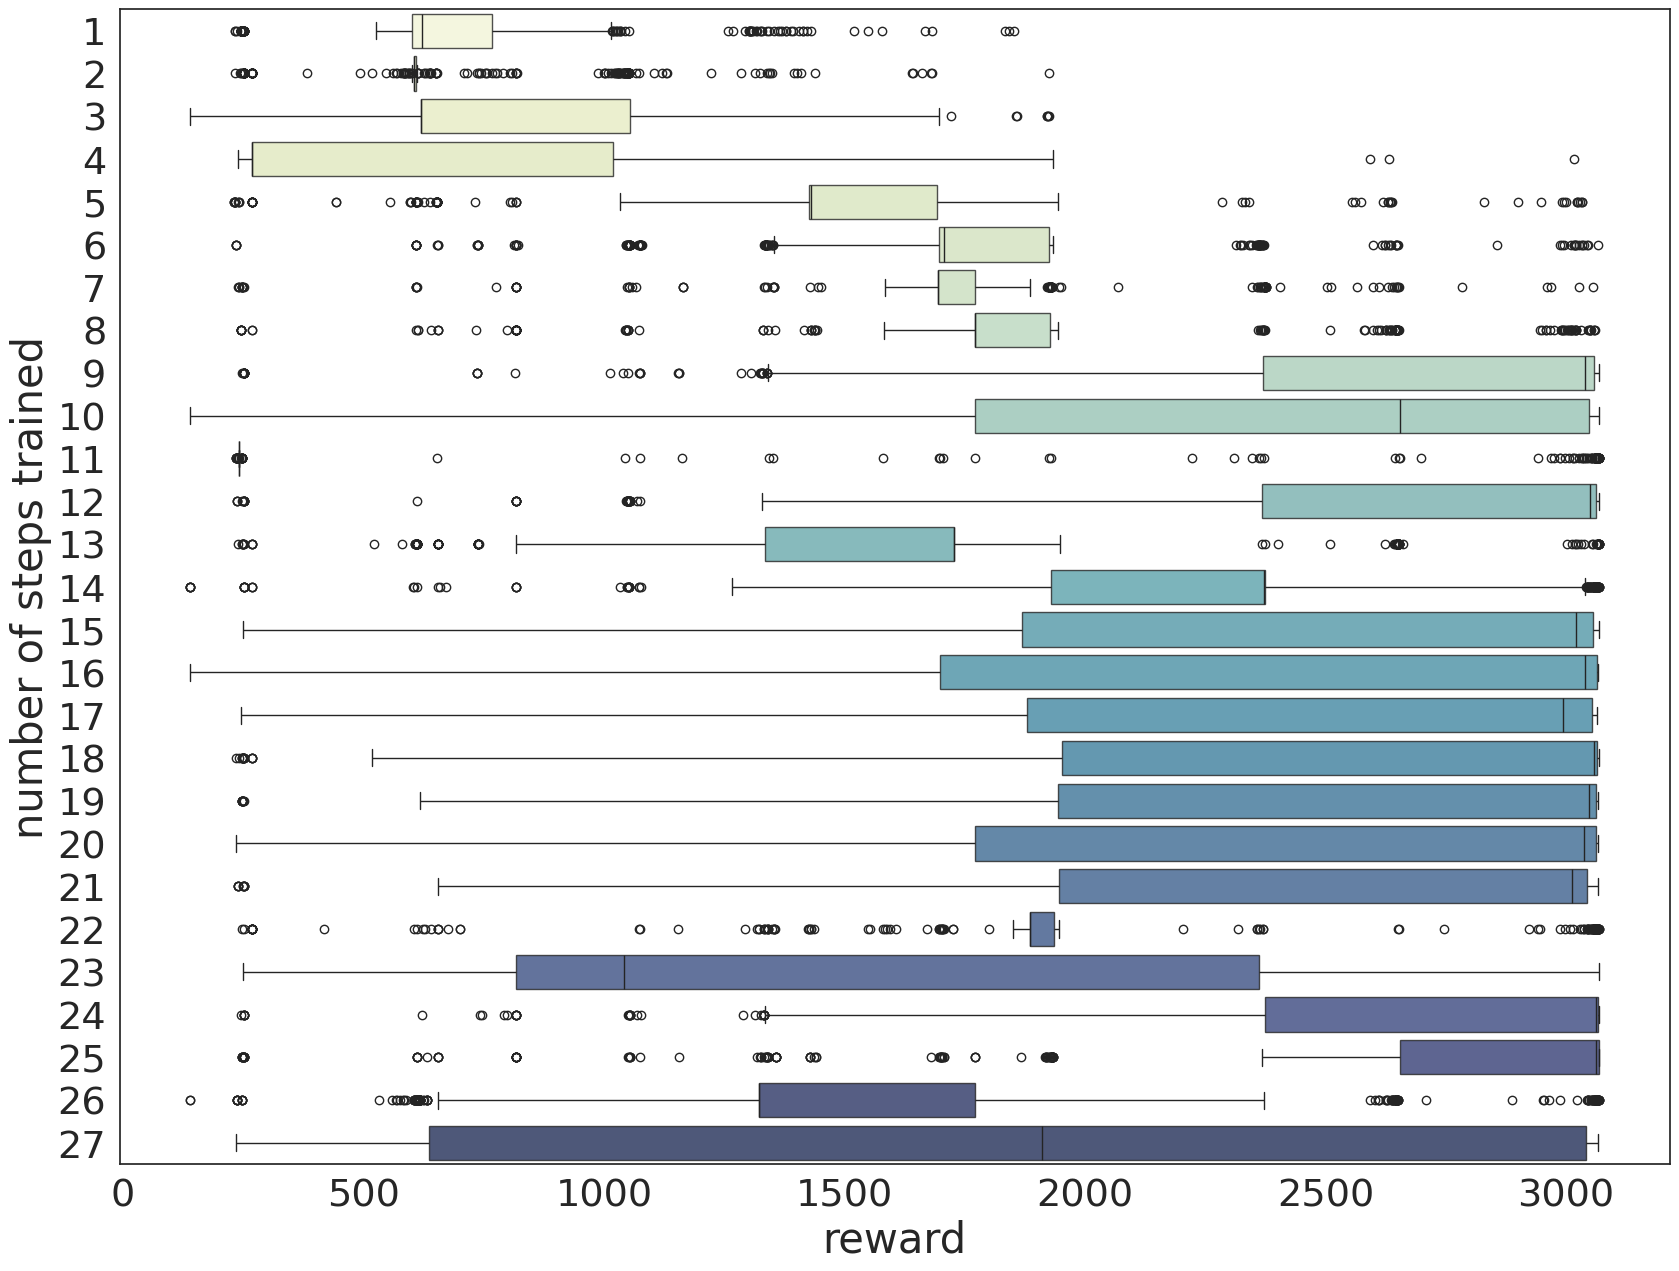

In [167]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlGnBu', desat=0.8, n_colors=27)
sns.boxplot(x ="reward", y="display_name", data = df_P1_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Permissive Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_P1_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_P1_ni.pdf", format='pdf', bbox_inches='tight')

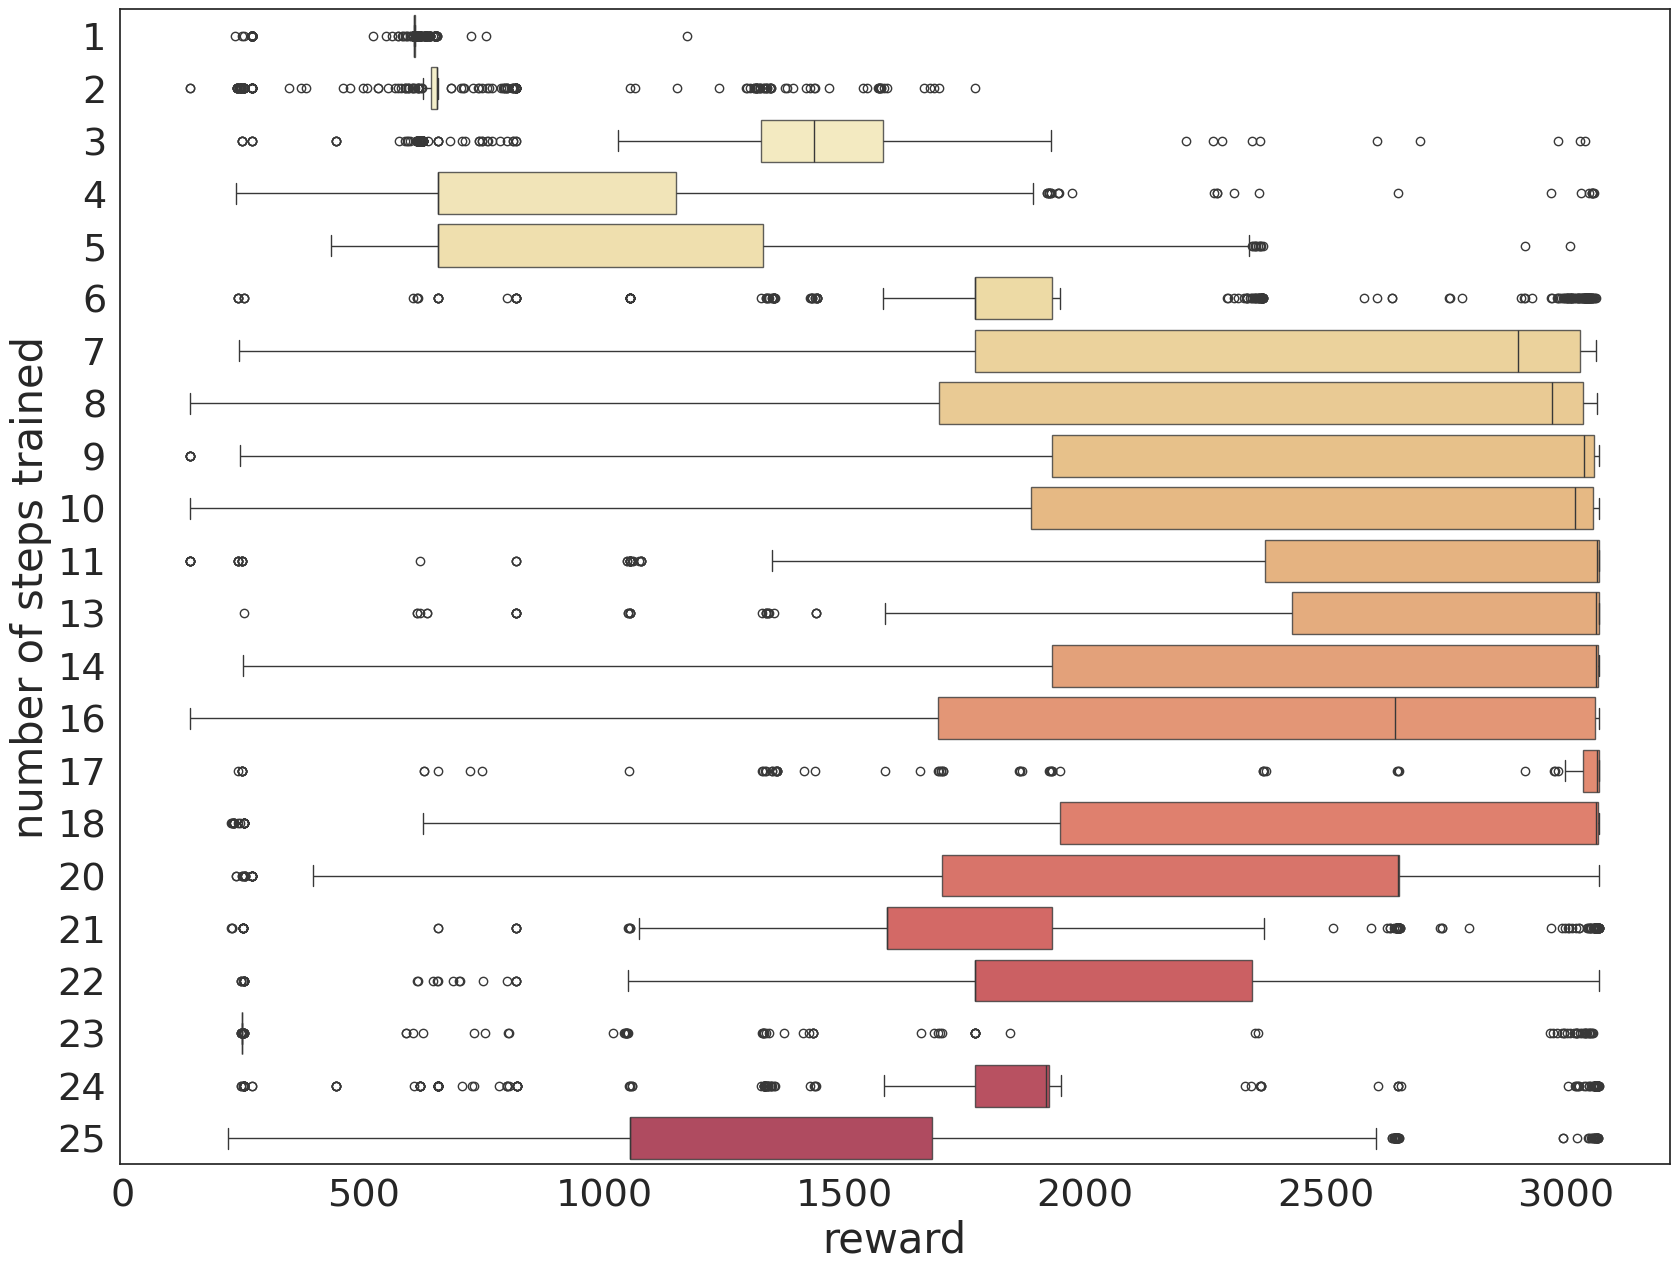

In [168]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlOrRd', desat=0.9, n_colors=24)
sns.boxplot(x ="reward", y="display_name", data = df_T2_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Constrained Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_T2_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_T2_ni.pdf", format='pdf', bbox_inches='tight')

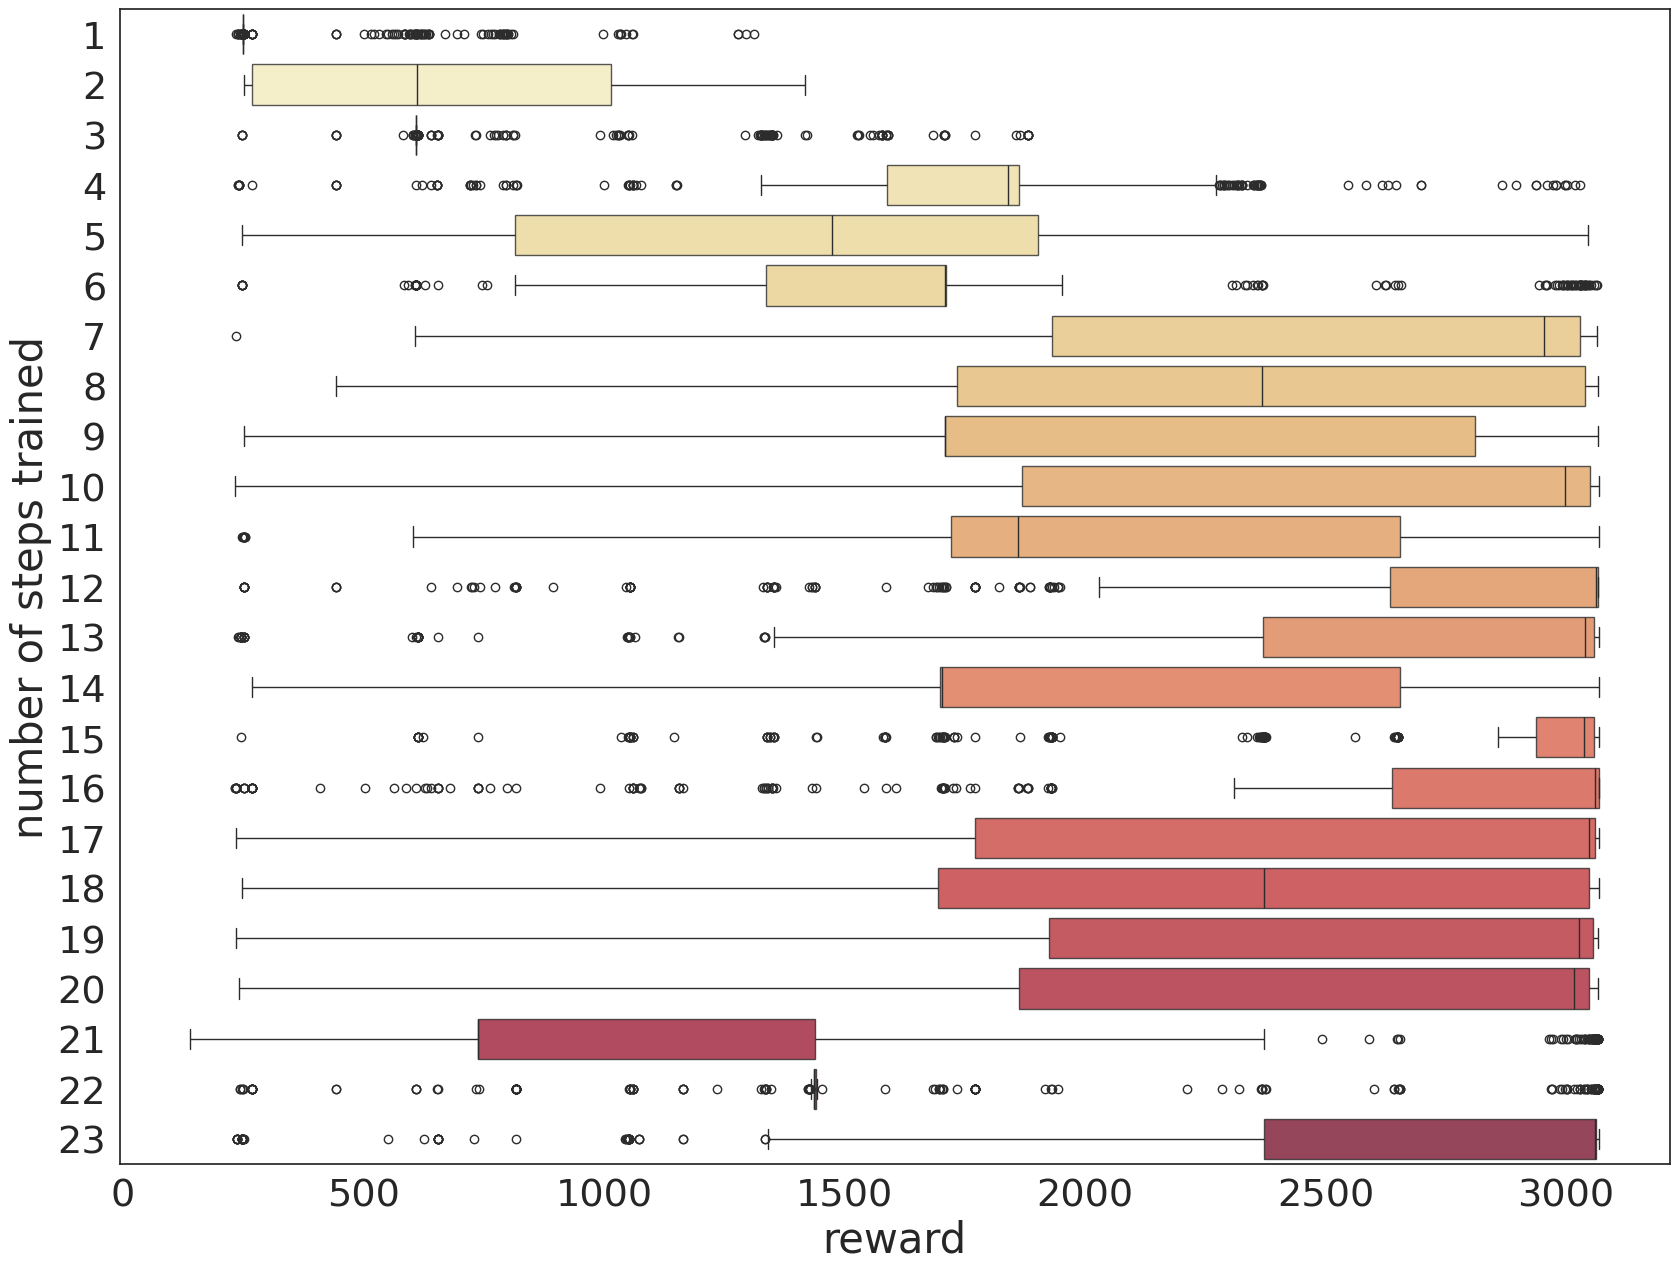

In [169]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlOrRd', desat=0.9, n_colors=23)
sns.boxplot(x ="reward", y="display_name", data = df_C1_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Constrained Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_C1_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_C1_ni.pdf", format='pdf', bbox_inches='tight')

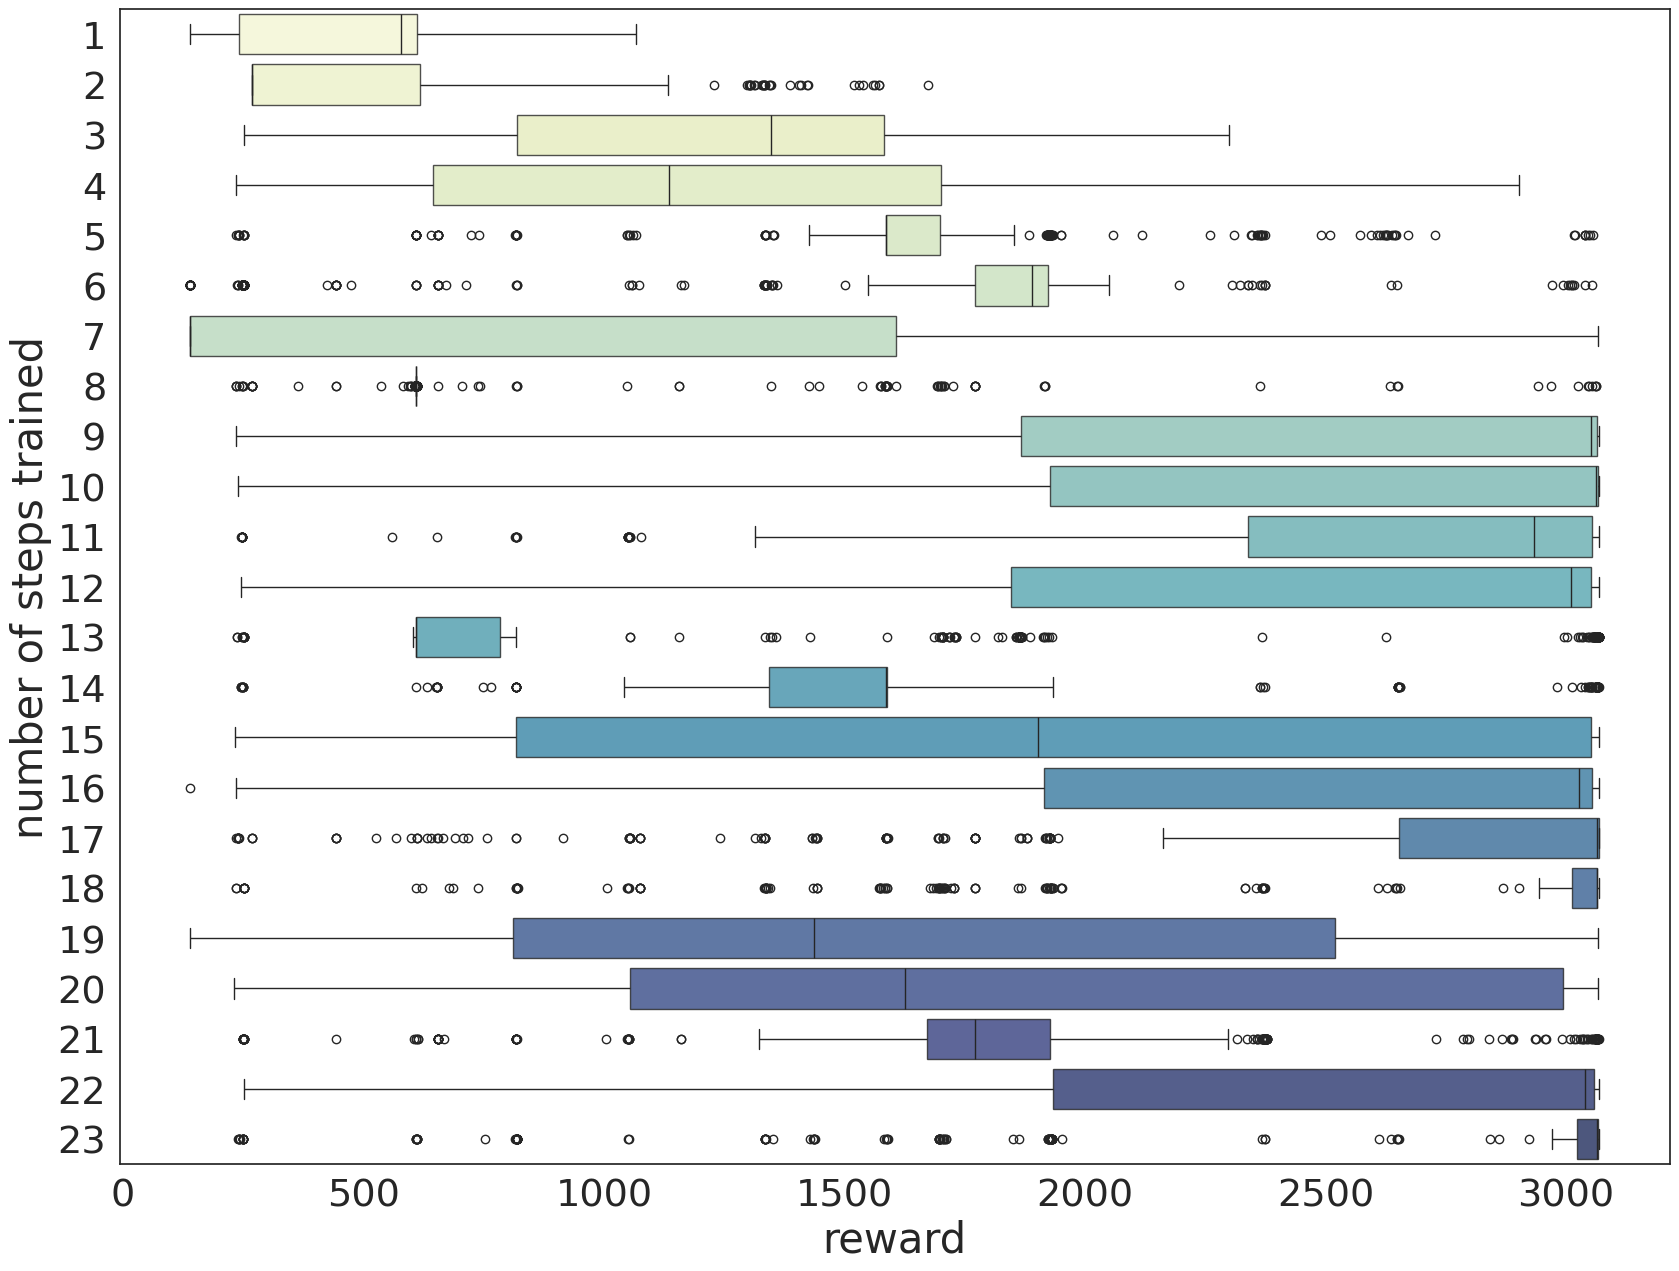

In [170]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlGnBu', desat=0.9, n_colors=23)
sns.boxplot(x ="reward", y="display_name", data = df_T1_ext_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Pipeless Permissive Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_T1_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_T1_ext_ni.pdf", format='pdf', bbox_inches='tight')

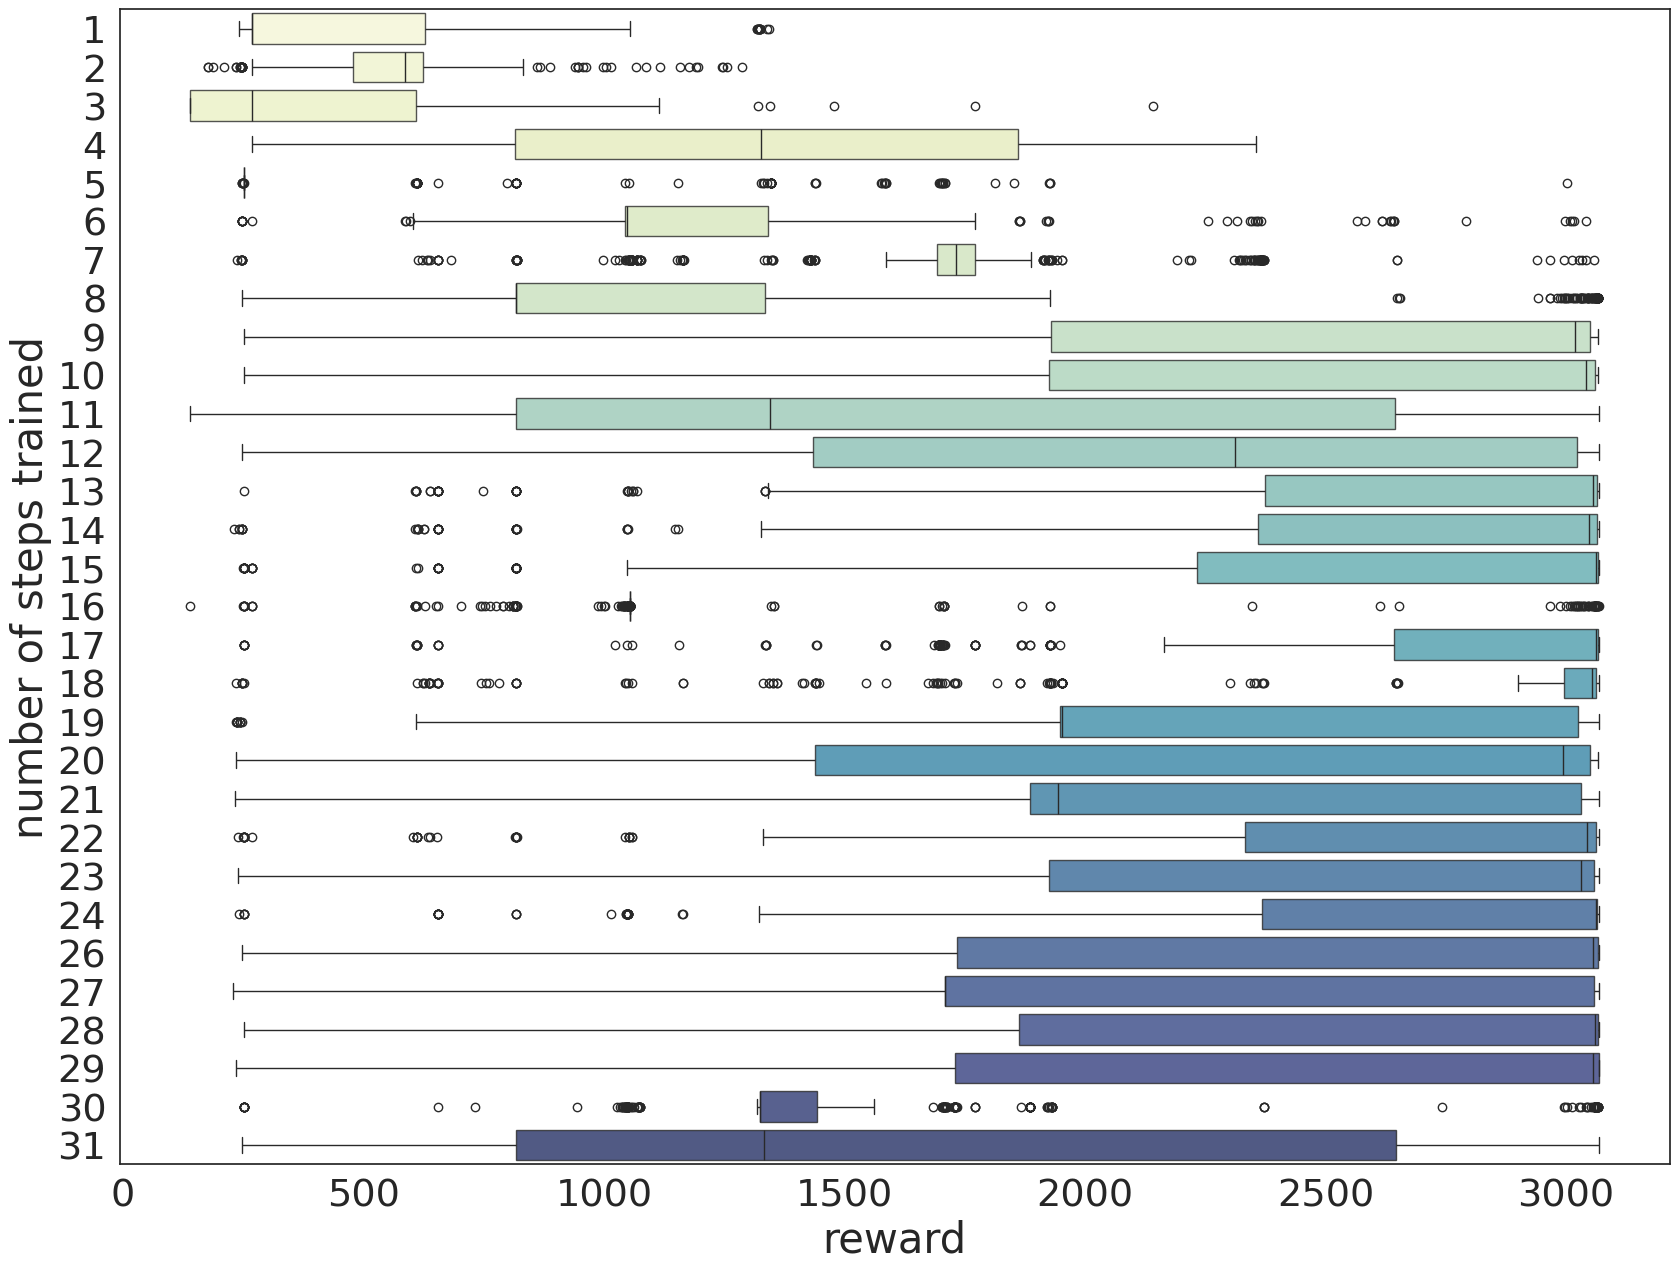

In [171]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlGnBu', desat=0.9, n_colors=31)
sns.boxplot(x ="reward", y="display_name", data = df_P1_ext_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Pipeless Permissive Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_P1_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_P1_ext_ni.pdf", format='pdf', bbox_inches='tight')

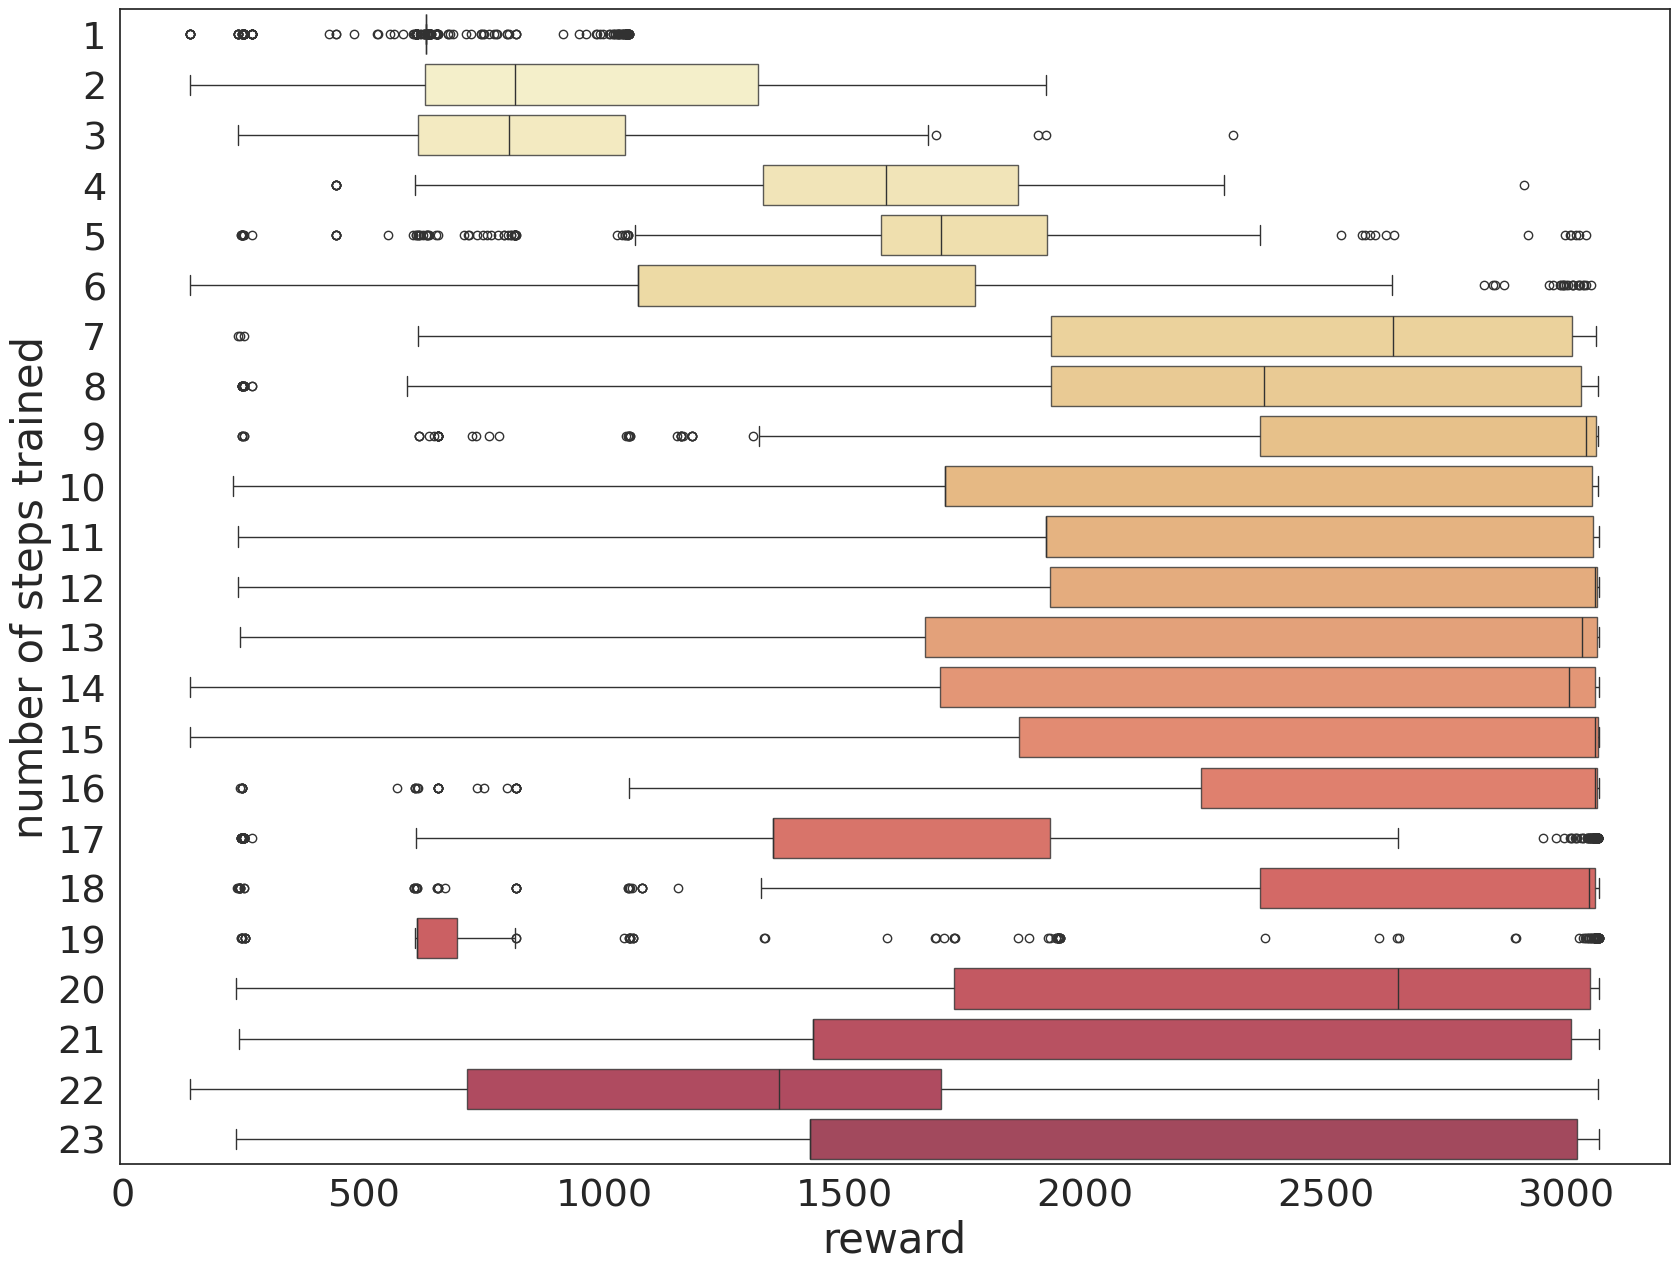

In [172]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlOrRd', desat=0.9, n_colors=24)
sns.boxplot(x ="reward", y="display_name", data = df_T2_ext_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Pipeless Constrained Target intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_T2_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_T2_ext_ni.pdf", format='pdf', bbox_inches='tight')

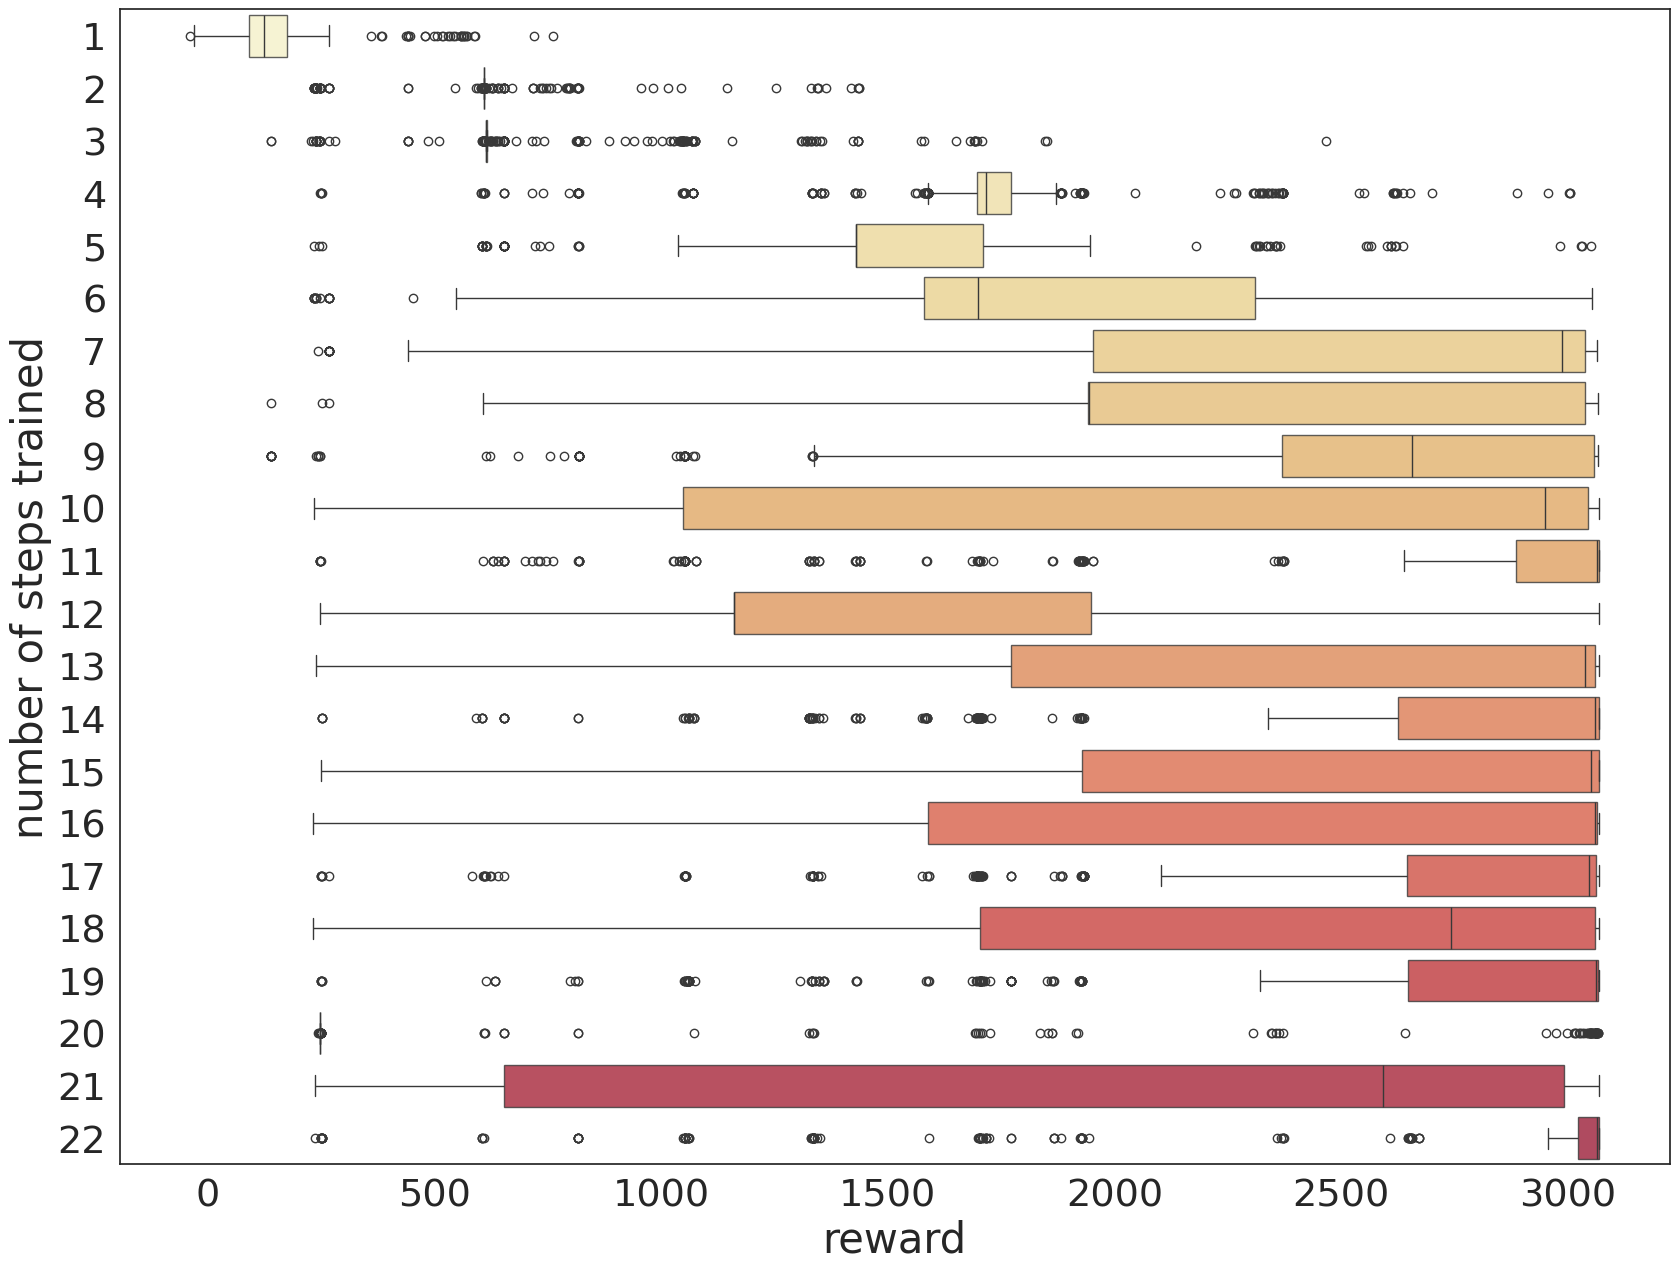

In [173]:
plt.figure(figsize=(20, 15))
sns.set_style("white")
sns.set_palette(palette='YlOrRd', desat=0.9, n_colors=24)
sns.boxplot(x ="reward", y="display_name", data = df_C1_ext_ni, hue="display_name", legend=False, boxprops=dict(alpha=.8)).set(xlabel="reward", ylabel="number of steps trained")

#plt.title(label="Reward distribution after playing the Pipeless Constrained Agent intermediate models for 500 episodes", loc='center', wrap=True)
plt.savefig("./playing_rewards_C1_ext_ni.png", bbox_inches='tight')
#plt.savefig("./playing_rewards_C1_ext_ni.pdf", format='pdf', bbox_inches='tight')